In [1]:
import pandas as pd
pd.options.display.max_columns=200

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sqlite3

conn=sqlite3.connect('land.db')
cursor = conn.cursor()

In [3]:
df=pd.read_sql_query('SELECT * FROM land_data',conn)

df=df.replace('None', None)
df=df.replace('[]', None)
df.columns=df.columns.str.title()

In [4]:
df

,Url,Address,Title,Price,Area,Property_Type,Tags,Details
0,https://www.landsearch.com/properties/--elkins...,"_ Elkins Rd Monmouth, OR 97361","Recreational Land & Farm for Sale in Monmouth,...","$499,000",100.85 acres,None,"['Agricultural', 'Recreational', 'Undeveloped'...","['Street Address|_ Elkins Rd', 'County|Polk Co..."
1,https://www.landsearch.com/properties/0-1008ac...,"0-10.08Ac Cottontown Rd Forest, VA 24551","Land for Sale in Forest, Virginia","$240,000",10.08 acres,None,"['Residential', 'Undeveloped']","['Street Address|0-10.08Ac Cottontown Rd', 'Co..."
2,https://www.landsearch.com/properties/0-1563ac...,"0-15.63Ac Screechum Hollow Rd Bedford, VA 24523","Land for Sale in Bedford, Virginia","$164,900",15.63 acres,None,"['Agricultural', 'Residential', 'Horse propert...",['Street Address|0-15.63Ac Screechum Hollow Rd...
3,https://www.landsearch.com/properties/0-18-pro...,"""0"" ~ 18 Progress St West Branch, MI 48661","Commercial Land for Sale in West Branch, Michigan","$40,000",2.22 acres,None,"['Commercial', 'Industrial', 'Mixed-use', 'Und...","['Street Address|""0"" ~ 18 Progress St', 'Count..."
4,https://www.landsearch.com/properties/0-191ac-...,"0-1.91Ac Jarrett Dr Bassett, VA 24055","Land for Sale in Bassett, Virginia","$12,400",1.91 acres,None,['Undeveloped'],"['Street Address|0-1.91Ac Jarrett Dr', 'County..."
...,...,...,...,...,...,...,...,...
122810,https://www.landsearch.com/properties/3830-s-s...,"3830 S S Memorial Dr Winterville, NC 28590","Commercial Land for Sale in Winterville, North...","$699,500",1.55 acres,None,"['Commercial', 'Undeveloped']","['Street Address|3830 S S Memorial Dr', 'Count..."
122811,https://www.landsearch.com/properties/3830-van...,"3830 Vance Street Ext Reidsville, NC 27320","Agricultural Land for Sale in Reidsville, Nort...","$600,000",46.88 acres,None,"['Agricultural', 'Residential', 'Horse propert...","['Street Address|3830 Vance Street Ext', 'Coun..."
122812,https://www.landsearch.com/properties/383006-e...,"Okfuskee County Weleetka, OK 74880","Recreational Land for Sale in Weleetka, Oklahoma","$1,575,000",235 acres,None,"['Recreational', 'Bunker', 'Fenced', 'Hunting'...","['County|Okfuskee County', 'Elevation|886 feet..."
122813,https://www.landsearch.com/properties/383087-e...,"383087 E 1030 Rd Okemah, OK 74859","Agricultural Land for Sale in Okemah, Oklahoma","$280,000",80 acres,None,"['Agricultural', 'Bunker', 'Pasture', 'Pond', ...","['Street Address|383087 E 1030 Rd', 'County|Ok..."


In [5]:
state=df['Address'].apply(lambda x:x.split(', ')[-1].split(' ')[0].strip() if isinstance(x,str) else None)
zip=df['Address'].apply(lambda x:x.split(', ')[-1].split(' ')[-1].strip() if isinstance(x,str) else None)

df.insert(df.columns.get_loc('Address')+1,'State',state)
df.insert(df.columns.get_loc('Address')+2,'Zip',zip)

df=df.drop(columns='Address')

In [6]:
df['Price']=df['Price'].apply(lambda x:x.split('$')[-1].split('min')[0].replace(',','') if isinstance(x,str) else None).apply(pd.to_numeric,errors='coerce')

In [7]:
df['Area']=df['Area'].apply(lambda x:x.split('acre')[0].replace(',','') if isinstance(x,str) else None).apply(pd.to_numeric)
df=df.rename(columns={'Area':'Area (Acre)'})

In [8]:
import ast


def apply_ast(x):
    try:
        return ast.literal_eval(x)
    except:
        return None


df['Tags']=df['Tags'].apply(lambda x:apply_ast(x))
df['Property_Type']=df['Property_Type'].apply(lambda x:apply_ast(x))
df['Details']=df['Details'].apply(lambda x:apply_ast(x))

### Has House

In [9]:
has_house=df['Property_Type'].apply(lambda x:True if isinstance(x,list) else False)

house_area=df['Property_Type'].apply(lambda x:[i for i in x if 'Sq' in i][0] if isinstance(x, list) else None)
house_area=house_area.apply(lambda x:x.split('Sq')[0].replace(',','') if isinstance(x,str) else None).apply(pd.to_numeric,errors='coerce')


house_built_year=df['Property_Type'].apply(lambda x:[i for i in x if i.endswith('Built')] if isinstance(x, list) else None)
house_built_year=house_built_year.apply(lambda x:x[0].split('Built')[0] if isinstance(x,list) and len(x)>0 else None).apply(pd.to_numeric,errors='coerce')


df['Has House']=has_house
df['House Area']=house_area
df['House Built Year']=house_built_year

df=df.drop(columns='Property_Type')

### Tags

In [10]:
exploded_df = df.explode('Tags')
dummy_df = pd.get_dummies(exploded_df['Tags'], prefix='Tag')
dummy_df = dummy_df.groupby(level=0).sum()

df=pd.concat([df,dummy_df],axis=1)

df=df.drop(columns='Tags')

### Details

In [11]:
df['Details']=[{j.split('|')[0]:j.split('|')[1] for j in i} if isinstance(i, list) else {} for i in df['Details']]

In [12]:
details_df=pd.json_normalize(df['Details'])

nan_columns=list(details_df.isna().mean()[details_df.isna().mean()>0.4].index)
details_df=details_df.drop(columns=nan_columns)

In [13]:
details_df=details_df.drop(columns=['Street Address','County','MLS Number'])

In [14]:
details_df['Elevation']=details_df['Elevation'].apply(lambda x:x.split('feet')[0].replace(',','') if isinstance(x,str) else None).apply(pd.to_numeric,errors='coerce')
details_df=details_df.rename(columns={'Elevation':'Elevation (Feet)'})

In [15]:
details_df['Date Posted'] = details_df['Date Posted'].replace({'Sept': 'Sep', 'June':'Jun', 'July':'Jul'}, regex=True)
details_df['Date Posted']=pd.to_datetime(details_df['Date Posted'])

In [16]:
lat=details_df['Coordinates'].apply(lambda x:x.split(',')[0] if isinstance(x,str) else None).apply(pd.to_numeric)
lon=details_df['Coordinates'].apply(lambda x:x.split(',')[1] if isinstance(x,str) else None).apply(pd.to_numeric)

details_df['Lat']=lat
details_df['Lon']=lon

details_df=details_df.drop(columns='Coordinates')


df=pd.concat([df,details_df],axis=1)

df=df.drop(columns='Details')

In [17]:
df

,Url,State,Zip,Title,Price,Area (Acre),Has House,House Area,House Built Year,Tag_A-frame house,Tag_Agricultural,Tag_Airstrip,Tag_Barn,Tag_Barndominium,Tag_Beachfront,Tag_Borders public land,Tag_Bunker,Tag_By owner,Tag_Cabin,Tag_Campsite,Tag_Cattle ranch,Tag_Cave,Tag_Cheap,Tag_Chicken farm,Tag_Commercial,Tag_Conservation,Tag_Cottage,Tag_Creek,Tag_Dairy farm,Tag_Desert,Tag_Development,Tag_Distressed,Tag_Farm house,Tag_Fenced,Tag_Fishing,Tag_Golf course lot,Tag_Historic,Tag_Homestead,Tag_Horse property,Tag_House,Tag_Hunting,Tag_Industrial,Tag_Investment,Tag_Irrigated,Tag_Island,Tag_Lake property,Tag_Lodge,Tag_Mineral rights,Tag_Mixed-use,Tag_Mobile home,Tag_Mountain,Tag_New construction,Tag_Off-grid,Tag_Oil,Tag_Orchard,Tag_Organic farm,Tag_Owner financed,Tag_Pasture,Tag_Pond,Tag_RV lot,Tag_Ranch,Tag_Recreational,Tag_Rent to own,Tag_Residential,Tag_Resort,Tag_River property,Tag_Row crop,Tag_Rural,Tag_Septic system,Tag_Small farm,Tag_Solar power,Tag_Spring,Tag_Stream,Tag_Sustainable,Tag_Timber,Tag_Tiny home,Tag_Undeveloped,Tag_Unrestricted,Tag_Vineyard,Tag_Water rights,Tag_Water well,Tag_Waterfall,Tag_Waterfowl,Tag_Waterfront,Tag_Wetland,Tag_Wooded,Tag_Workshop,Elevation (Feet),Date Posted,Type,Lat,Lon
0,https://www.landsearch.com/properties/--elkins...,OR,97361,"Recreational Land & Farm for Sale in Monmouth,...",499000.0,100.85,False,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,213.0,2024-12-02,NaN,NaN,NaN
1,https://www.landsearch.com/properties/0-1008ac...,VA,24551,"Land for Sale in Forest, Virginia",240000.0,10.08,False,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,869.0,2024-10-28,Land,37.4042,-79.2824
2,https://www.landsearch.com/properties/0-1563ac...,VA,24523,"Land for Sale in Bedford, Virginia",164900.0,15.63,False,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,919.0,2024-03-07,Land,37.3660,-79.4630
3,https://www.landsearch.com/properties/0-18-pro...,MI,48661,"Commercial Land for Sale in West Branch, Michigan",40000.0,2.22,False,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,958.0,2022-01-10,NaN,44.2688,-84.2422
4,https://www.landsearch.com/properties/0-191ac-...,VA,24055,"Land for Sale in Bassett, Virginia",12400.0,1.91,False,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1086.0,2024-09-25,Land,36.7225,-80.0206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122810,https://www.landsearch.com/properties/3830-s-s...,NC,28590,"Commercial Land for Sale in Winterville, North...",699500.0,1.55,False,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,69.0,2024-01-20,Commercial Sale,35.5581,-77.4068
122811,https://www.landsearch.com/properties/3830-van...,NC,27320,"Agricultural Land for Sale in Reidsville, Nort...",600000.0,46.88,False,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,820.0,2024-02-05,Land,36.3629,-79.7165
122812,https://www.landsearch.com/properties/383006-e...,OK,74880,"Recreational Land for Sal

# EDA

In [18]:
#leave useful columns for EDA
df=df[['State','Zip','Lon','Lat', 'Price', 'Area (Acre)', 'Date Posted']]

In [19]:
df.to_csv('USA Land Prices.csv',index=False)

In [20]:
df['Price Per Acre']=df['Price']/df['Area (Acre)']

In [21]:
df=df[df['Price']<=1e7]
df=df[df['Price Per Acre']>5000]

### By State

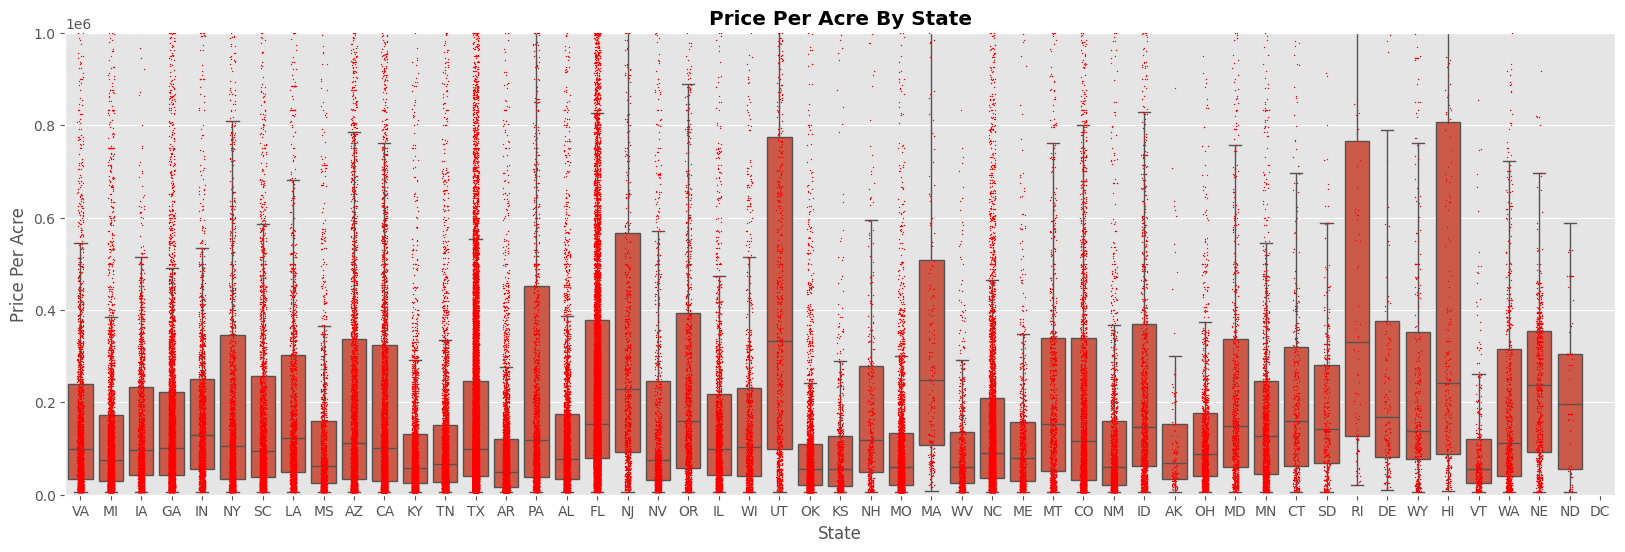

In [22]:
plt.figure(figsize=(20, 6))

sns.boxplot(data=df, x='State', y='Price Per Acre', showfliers=False)
sns.stripplot(data=df, x='State', y='Price Per Acre', size=1, color='red', jitter=True)

plt.title('Price Per Acre By State',fontweight='bold')
plt.ylim(0, 1e6)
plt.show()

In [23]:
grouped=df.groupby('State')['Price Per Acre'].median().reset_index()


fig=px.choropleth(grouped,
                  locations='State',locationmode='USA-states',scope='usa',
                  color=pd.qcut(grouped['Price Per Acre'],q=5,labels=False)+1,color_continuous_scale='Reds',
                  )

fig.update_layout(title=dict(text="Meidan Land Price Per Acre by State",font_family='Arial Black'))
fig.update_traces(marker_line_width=0.1)
fig.show()


In [24]:
grouped = df.groupby('State')['Price Per Acre'].median().reset_index()
fig = px.choropleth(grouped, locations='State', locationmode='USA-states', scope='usa',color_continuous_scale=['white'])
sample_df = df.sample(10000)
trace_1 = go.Scattergeo(lat=sample_df['Lat'], lon=sample_df['Lon'], mode='markers', marker=dict(color=pd.qcut(sample_df['Price Per Acre'], q=5, labels=False)+1, colorscale='hot', size=2),name='Property')
fig.add_trace(trace_1)
fig.update_layout(title=dict(text='Distribution of Lands For Sale in the USA', font_family='Arial Black'))
fig.update_traces(marker_line_width=0.1)
fig.show()
